In [1]:
# Importing the necessary libraries

# For data manipulation and analysis
import pandas as pd  

# For data visualization
import matplotlib.pyplot as plt 

# For numerical operations
import numpy as np  

# For statistical functions
from scipy import stats  

# Suppressing specific warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Ignore future warnings to avoid clutter

In [2]:
# Loading the credit card transactions dataset into a pandas DataFrame
data = pd.read_csv('creditcard.csv') 

In [3]:
# Displaying the first 5 rows of the DataFrame
data.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Analysis of dataset

In [4]:
# Getting a summary of the dataset
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Checking for missing values in the dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The dataset is complete, with no null or missing values across any of the columns.

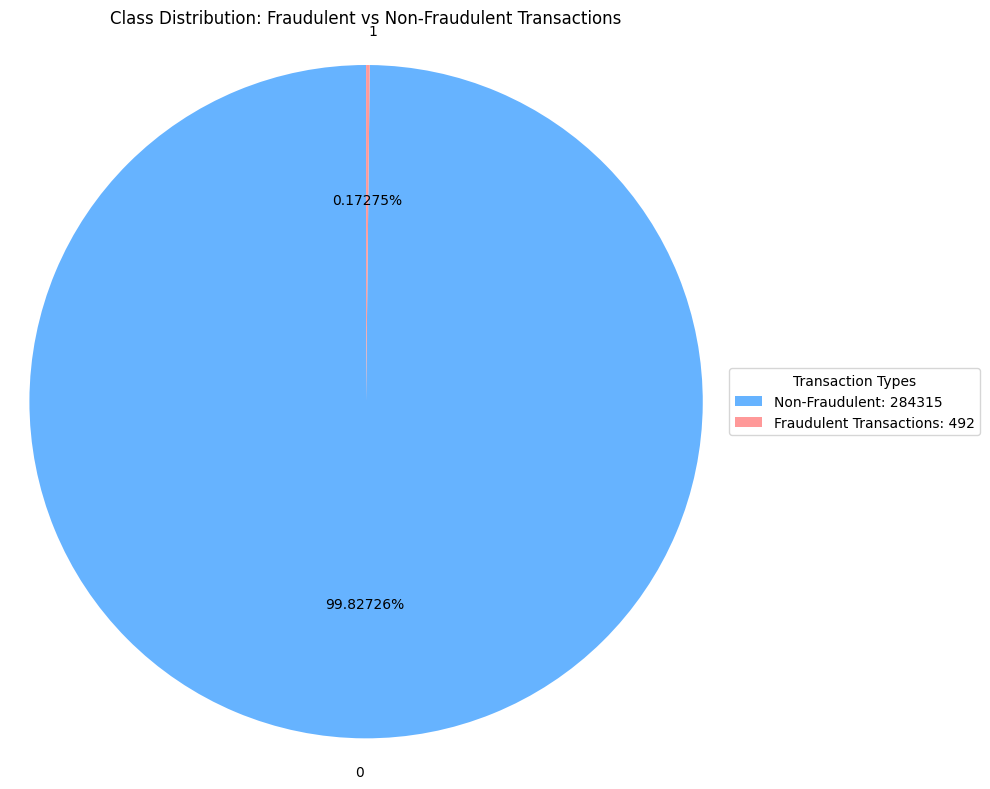

In [6]:
# Calculating the count of each class (Fraudulent and Non-Fraudulent transactions)
class_counts = data['Class'].value_counts() 

# Defining colors and labels for the pie chart
colors = ['#66b3ff', '#ff9999']  # Colors for Non-Fraudulent and Fraudulent transactions
labels = ['Non-Fraudulent', 'Fraudulent Transactions']  # Descriptive labels for the classes

# Creating a pie chart to visualize the class distribution
plt.figure(figsize=(10, 8))  # Setting the figure size
patches, texts, autotexts = plt.pie(
    class_counts.values,  # The values to plot 
    labels=class_counts.index,  # Labels for the slices
    autopct='%1.5f%%',  # Display percentages with 5 decimal places
    colors=colors,  # Applying the defined colors
    startangle=90  # Starting angle for the first slice
)

# Adding a legend to the pie chart
plt.legend(
    patches,  # The colored patches in the pie chart
    [f'{label}: {count}' for label, count in zip(labels, class_counts)],  # Adding both labels and counts
    title="Transaction Types",  # Title for the legend
    loc="center left",  # Placing the legend to the left of the chart
    bbox_to_anchor=(1, 0, 0.5, 1)  # Adjusting the legend's position
)

# Adding a title and formatting the chart
plt.title('Class Distribution: Fraudulent vs Non-Fraudulent Transactions')  # Title for the chart
plt.axis('equal')  # Ensures the pie chart is drawn as a circle
plt.tight_layout()  # Adjusts spacing to prevent overlap
plt.show()  # Displays the pie chart

The dataset contains 284,807 transactions, of which only 492 are fraudulent, resulting in a significant class imbalance. With fraudulent transactions making up just 0.172% of the total, the model is prone to bias towards the majority class (non-fraudulent). This imbalance makes it challenging for the model to accurately detect fraud, as it may tend to predict all transactions as non-fraudulent.

In [7]:
# Calculating average transaction value for each class
avg_transaction_value = data.groupby('Class')['Amount'].mean()

print(avg_transaction_value)

Class
0     88.291022
1    122.211321
Name: Amount, dtype: float64


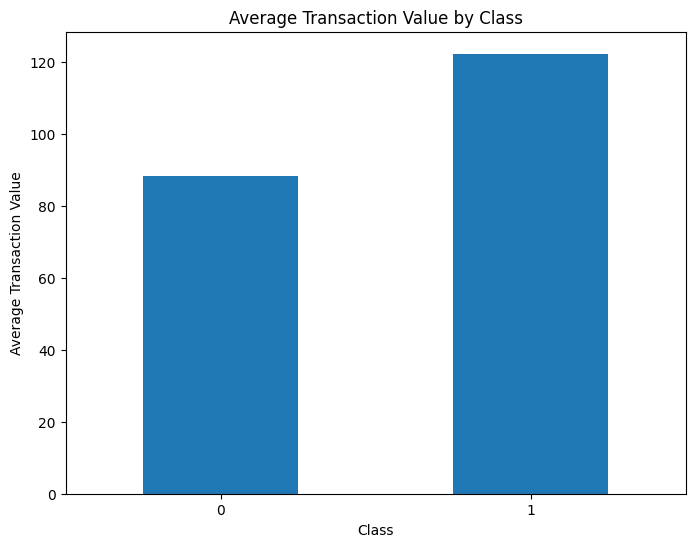

In [8]:
# Plotting the average transaction value for each class
plt.figure(figsize=(8, 6))  # Setting the figure size

# Creating a bar chart to visualize the average transaction values
avg_transaction_value.plot(kind='bar') 

# Adding chart title and axis labels
plt.title('Average Transaction Value by Class')  # Title of the chart
plt.xlabel('Class')  # Label for the x-axis
plt.ylabel('Average Transaction Value')  # Label for the y-axis

# Formatting the x-axis ticks
plt.xticks(rotation=0)

# Displaying the chart
plt.show()

In [9]:
# Calculating detailed transaction statistics for each class
transaction_stats = data.groupby('Class')['Amount'].agg(['mean', 'median', 'min', 'max'])  

# Printing the calculated statistics
print(transaction_stats)  

             mean  median  min       max
Class                                   
0       88.291022   22.00  0.0  25691.16
1      122.211321    9.25  0.0   2125.87


<Figure size 800x600 with 0 Axes>

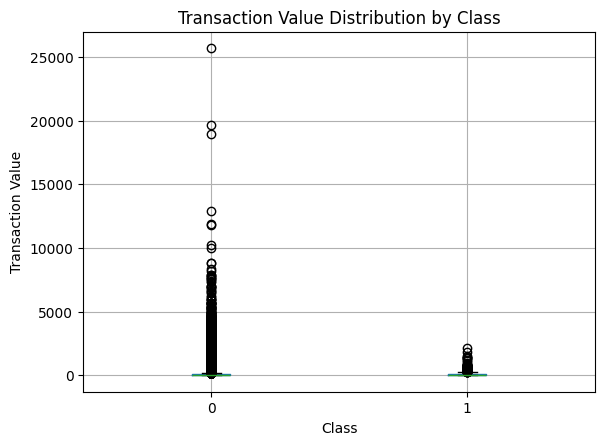

In [10]:
# Creating a boxplot to visualize the transaction value distribution for each class
plt.figure(figsize=(8, 6))  # Setting the figure size

# Generating the boxplot grouped by 'Class'
data.boxplot(column='Amount', by='Class')  # Creates a boxplot for the 'Amount' column, grouped by 'Class'

# Adding chart title and axis labels
plt.title('Transaction Value Distribution by Class')  # Title of the boxplot
plt.suptitle('')  # Removes the default 'by' title that pandas adds
plt.xlabel('Class')  # Label for the x-axis
plt.ylabel('Transaction Value')  # Label for the y-axis

# Displaying the boxplot
plt.show() 

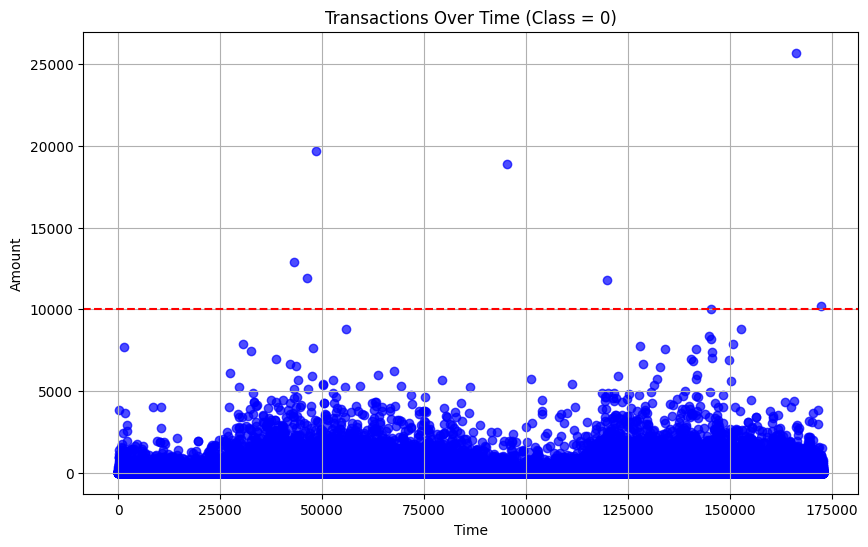

In [11]:
# Filtering the data to include only non-fraudulent transactions (Class = 0)
data_class_0 = data[data['Class'] == 0]  # Selects rows where 'Class' is 0 (Non-Fraudulent transactions)

# Creating the scatter plot
plt.figure(figsize=(10, 6))  # Setting the figure size for the plot

# Adding a horizontal line at y = 10,000 to represent a threshold
plt.axhline(y=10000, color='red', linestyle='--', label='Threshold')  # A red dashed line at the 10,000 transaction amount

# Creating the scatter plot of transaction data (Time vs Amount)
plt.scatter(data_class_0['Time'], data_class_0['Amount'], alpha=0.7, color='blue')  
# Plots the 'Time' against 'Amount' for non-fraudulent transactions, with transparency set to 0.7 and blue color

# Adding titles and labels
plt.title('Transactions Over Time (Class = 0)')  # Title for the scatter plot
plt.xlabel('Time')  # Label for the x-axis
plt.ylabel('Amount')  # Label for the y-axis

# Displaying gridlines on the plot
plt.grid(True)  # Enables gridlines for better readability of the plot

# Displaying the plot
plt.show()  # Renders the scatter plot

In [12]:
# Counting the number of non-fraudulent transactions with an amount greater than or equal to 10,000
count_high_value_transactions = ((data['Amount'] >= 10000) & (data["Class"] == 0)).sum()

# Printing the count of high-value transactions
print(f"Number of transactions with amount greater than 10,000 :  {count_high_value_transactions}")  

Number of transactions with amount greater than 10,000 :  8


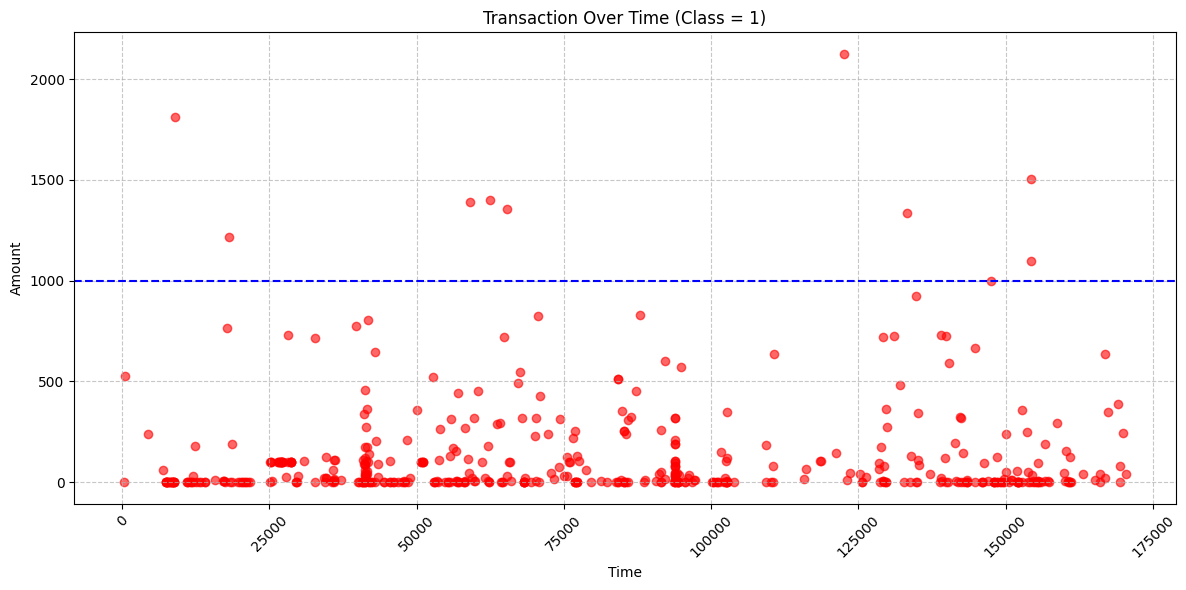

In [13]:
# Filtering the data to include only fraudulent transactions (Class = 1)
fraudulent_data = data[data['Class'] == 1]  # Selects rows where 'Class' is 1 (Fraudulent transactions)

# Creating the scatter plot
plt.figure(figsize=(12, 6))  # Setting the figure size for the plot

# Creating the scatter plot of fraudulent transactions (Time vs Amount)
plt.scatter(fraudulent_data['Time'], fraudulent_data['Amount'], alpha=0.6, color='red')  
# Plots 'Time' against 'Amount' for fraudulent transactions with transparency set to 0.6 and red color

# Adding titles and labels
plt.title('Transaction Over Time (Class = 1)')  # Title for the scatter plot
plt.xlabel('Time')  # Label for the x-axis
plt.ylabel('Amount')  # Label for the y-axis

# Adding a horizontal line at y = 1000 to represent a threshold
plt.axhline(y=1000, color='blue', linestyle='--', label='Threshold')  
# A blue dashed line at the 1,000 transaction amount, representing a threshold for fraudulent transactions

# Rotating x-axis labels for better readability if needed
plt.xticks(rotation=45)  # Rotates x-axis labels by 45 degrees for better readability

# Adding gridlines to the plot for easier interpretation
plt.grid(True, linestyle='--', alpha=0.7)  # Enables gridlines with dashed lines and sets transparency to 0.7

# Adjusting layout to prevent cutting off labels or parts of the plot
plt.tight_layout()  # Ensures the plot fits within the figure area and labels are not cut off

# Displaying the plot
plt.show()  # Renders the scatter plot

In [14]:
# Counting the number of fraudulent transactions with an amount greater than or equal to 1,000
count_high_value_fraud_transactions = ((data['Amount'] >= 1000) & (data["Class"] == 1)).sum()  

# Printing the count of high-value fraudulent transactions
print(f"Number of transactions with amount greater than 1,000 :{count_high_value_fraud_transactions}")  

Number of transactions with amount greater than 1,000 :9


Upon analyzing the dataset and visualizing the transaction data through various graphs, it becomes apparent that there are several outliers that could potentially skew the model's performance. Specifically:

- There are 8 non-fraudulent transactions with values exceeding 10,000 dollars, which significantly deviate from the typical transaction values observed within this class.
- Additionally, there are 9 fraudulent transactions with values greater than 1,000 dollars, which, though they are associated with fraudulent activity, still fall outside the expected range of typical fraudulent transaction amounts.

Given the substantial deviation of these transactions from the general distribution of data, they are considered clear outliers. To ensure the accuracy and effectiveness of the model, it is crucial to remove these outliers from the training dataset prior to model training. This step is necessary to avoid introducing noise into the model and to improve its ability to generalize on unseen data.

By excluding these outliers, we can ensure that the model focuses on more representative transactions, ultimately leading to more reliable and accurate predictions in detecting fraudulent activity.

In [15]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
# Importing the train_test_split function from scikit-learn for splitting the dataset
from sklearn.model_selection import train_test_split

# Separating features (X) and target variable (y)
X = data.drop('Class', axis=1)  # Drops the 'Class' column from the dataset to create the feature set (X)
y = data['Class']  # The target variable (y) is the 'Class' column, indicating fraudulent or non-fraudulent transactions

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)  

In [17]:
print(X_train.shape[0])
print(y_train.shape[0])
print(X_test.shape[0])
print(y_test.shape[0])

227845
227845
56962
56962


# Removing the outliers

In [18]:
# Defining a function to remove outliers from the training data
def remove_outliers(X_train, y_train):
    # Creating a boolean mask to identify rows to keep (initially all rows are kept)
    mask = np.ones(len(X_train), dtype=bool)  # A mask that initially keeps all rows (True for all rows)

    # Identifying outliers in class 0 (Non-Fraudulent transactions) where 'Amount' > 10,000
    mask_class_0 = (y_train == 0) & (X_train['Amount'] > 10000)  # For class 0, where 'Amount' exceeds 10,000

    # Identifying outliers in class 1 (Fraudulent transactions) where 'Amount' > 1,000
    mask_class_1 = (y_train == 1) & (X_train['Amount'] > 1000)  # For class 1, where 'Amount' exceeds 1,000

    # Combining the masks to mark rows that are outliers
    mask[mask_class_0 | mask_class_1] = False  # Marking rows as False (to be excluded) where either mask_class_0 or mask_class_1 is True

    # Applying the mask to filter out the outliers from both X_train and y_train
    X_train_cleaned = X_train[mask]  # Filtering the features (X_train) by the mask
    y_train_cleaned = y_train[mask]  # Filtering the target variable (y_train) by the mask

    return X_train_cleaned, y_train_cleaned 

# Applying the function to remove outliers from the training data
X_train_filtered, y_train_filtered = remove_outliers(X_train, y_train)

# Printing the number of rows removed
print(f"We have removed {X_train.shape[0] - X_train_filtered.shape[0]} rows")  

# Displaying the number of rows before and after removing outliers
print(X_train.shape[0]) 
print(y_train.shape[0]) 
print(X_train_filtered.shape[0]) 
print(y_train_filtered.shape[0]) 

We have removed 13 rows
227845
227845
227832
227832


In [19]:
X_train_filtered.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32
180305,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99
42664,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10
198723,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10
82325,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10


# Feature Scaling

Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)

In [20]:
# Importing the RobustScaler from scikit-learn for feature scaling
from sklearn.preprocessing import RobustScaler

# Initializing the RobustScaler
rob_scaler = RobustScaler()  # RobustScaler scales the features based on median and interquartile range, making it robust to outliers

# Creating a copy of the filtered training data for scaling
X_train_scaled = X_train_filtered.copy()  # Creating a new DataFrame to store the scaled features, preserving the original data

# Scaling the 'Time' and 'Amount' columns using the RobustScaler
X_train_scaled[['Time', 'Amount']] = rob_scaler.fit_transform(X_train_filtered[['Time', 'Amount']])  
# Applies the scaler to 'Time' and 'Amount' columns, scaling them to a range based on the median and interquartile range

# Displaying the first few rows of the scaled data
X_train_scaled.head()  # Shows the top 5 rows of the scaled feature set

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,0.905778,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.204400
180305,0.465988,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.264690
42664,-0.512279,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,2.131718
198723,0.561682,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.221387
82325,-0.298880,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,0.892509


# Balancing the dataset using over-sampling techniques


In [22]:
# Synthetic Minority Over-sampling Technique
from imblearn.over_sampling import SMOTE  

# Simple random oversampling
from imblearn.over_sampling import RandomOverSampler  

# Adaptive Synthetic Sampling
from imblearn.over_sampling import ADASYN  

# SMOTE for borderline instances
from imblearn.over_sampling import BorderlineSMOTE  

# Combination of SMOTE and Tomek Links
from imblearn.combine import SMOTETomek  

# Applying SMOTE (Synthetic Minority Over-sampling Technique) to balance the class distribution
smote = SMOTE(random_state=42)  # Initializes the SMOTE resampler with a fixed random state for reproducibility
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train_scaled, y_train_filtered)  
# Resamples the data using SMOTE, generating synthetic data points for the minority class

# Applying Random Over Sampler to balance the class distribution by randomly duplicating samples from the minority class
ros = RandomOverSampler(random_state=42)  # Initializes the RandomOverSampler with a fixed random state
X_train_resampled_ros, y_train_resampled_ros = ros.fit_resample(X_train_scaled, y_train_filtered)  
# Resamples the data by randomly oversampling the minority class

# Applying ADASYN (Adaptive Synthetic Sampling) to generate synthetic samples with an emphasis on difficult-to-learn samples
adasyn = ADASYN(random_state=42)  # Initializes the ADASYN resampler with a fixed random state
X_train_resampled_adasyn, y_train_resampled_adasyn = adasyn.fit_resample(X_train_scaled, y_train_filtered)  
# Resamples the data using ADASYN, focusing more on generating samples for the minority class near decision boundaries

# Applying Borderline-SMOTE, which is a variation of SMOTE that focuses on generating synthetic samples near the decision boundary
bsmote = BorderlineSMOTE(random_state=42)  # Initializes the Borderline-SMOTE resampler with a fixed random state
X_train_resampled_bsmote, y_train_resampled_bsmote = bsmote.fit_resample(X_train_scaled, y_train_filtered)  
# Resamples the data using Borderline-SMOTE, generating synthetic samples for the minority class near decision boundaries

# Applying SMOTETomek, which combines SMOTE with Tomek Links for cleaning noisy examples and balancing the dataset
smote_tomek = SMOTETomek(random_state=42)  # Initializes the SMOTETomek resampler with a fixed random state
X_train_resampled_smotetomek, y_train_resampled_smotetomek = smote_tomek.fit_resample(X_train_scaled, y_train_filtered)  

In [23]:
# Importing Counter from collections to count the occurrences of each class
from collections import Counter

# Counter(y_train) counts the occurrences of each class in the original training target variable
print("Original class distribution:", Counter(y_train))  

# Counter(y_train_resampled_smote) counts the occurrences of each class after applying SMOTE
print("Resampled class distribution using SMOTE:", Counter(y_train_resampled_smote))  

# Counter(y_train_resampled_ros) counts the occurrences of each class after applying Random Over Sampler
print("Resampled class distribution using Random Over Sampler:", Counter(y_train_resampled_ros))  

# Counter(y_train_resampled_adasyn) counts the occurrences of each class after applying ADASYN
print("Resampled class distribution using ADASYN:", Counter(y_train_resampled_adasyn))  

# Counter(y_train_resampled_bsmote) counts the occurrences of each class after applying Borderline-SMOTE
print("Resampled class distribution using Borderline-SMOTE:", Counter(y_train_resampled_bsmote))  

# Counter(y_train_resampled_smotetomek) counts the occurrences of each class after applying SMOTE-Tomek
print("Resampled class distribution using SMOTE-Tomek:", Counter(y_train_resampled_smotetomek))  

Original class distribution: Counter({0: 227451, 1: 394})
Resampled class distribution using SMOTE: Counter({0: 227446, 1: 227446})
Resampled class distribution using Random Over Sampler: Counter({0: 227446, 1: 227446})
Resampled class distribution using ADASYN: Counter({0: 227446, 1: 227424})
Resampled class distribution using Borderline-SMOTE: Counter({0: 227446, 1: 227446})
Resampled class distribution using SMOTE-Tomek: Counter({0: 227446, 1: 227446})


# Classification Models

Training RandomForestClassifier with SMOTE
Training GradientBoostingClassifier with SMOTE
Training XGBClassifier with SMOTE
Training DecisionTreeClassifier with SMOTE
Training LogisticRegression with SMOTE


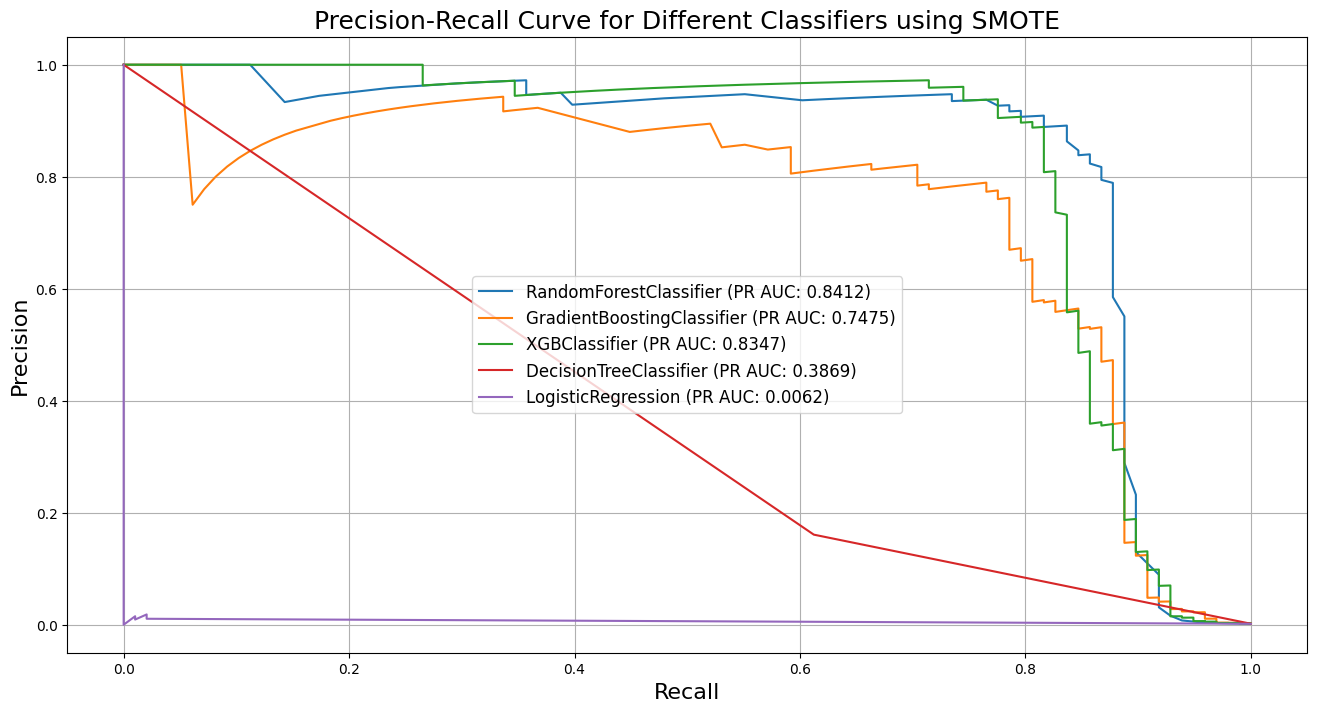

Training RandomForestClassifier with RandomOverSampler
Training GradientBoostingClassifier with RandomOverSampler
Training XGBClassifier with RandomOverSampler
Training DecisionTreeClassifier with RandomOverSampler
Training LogisticRegression with RandomOverSampler


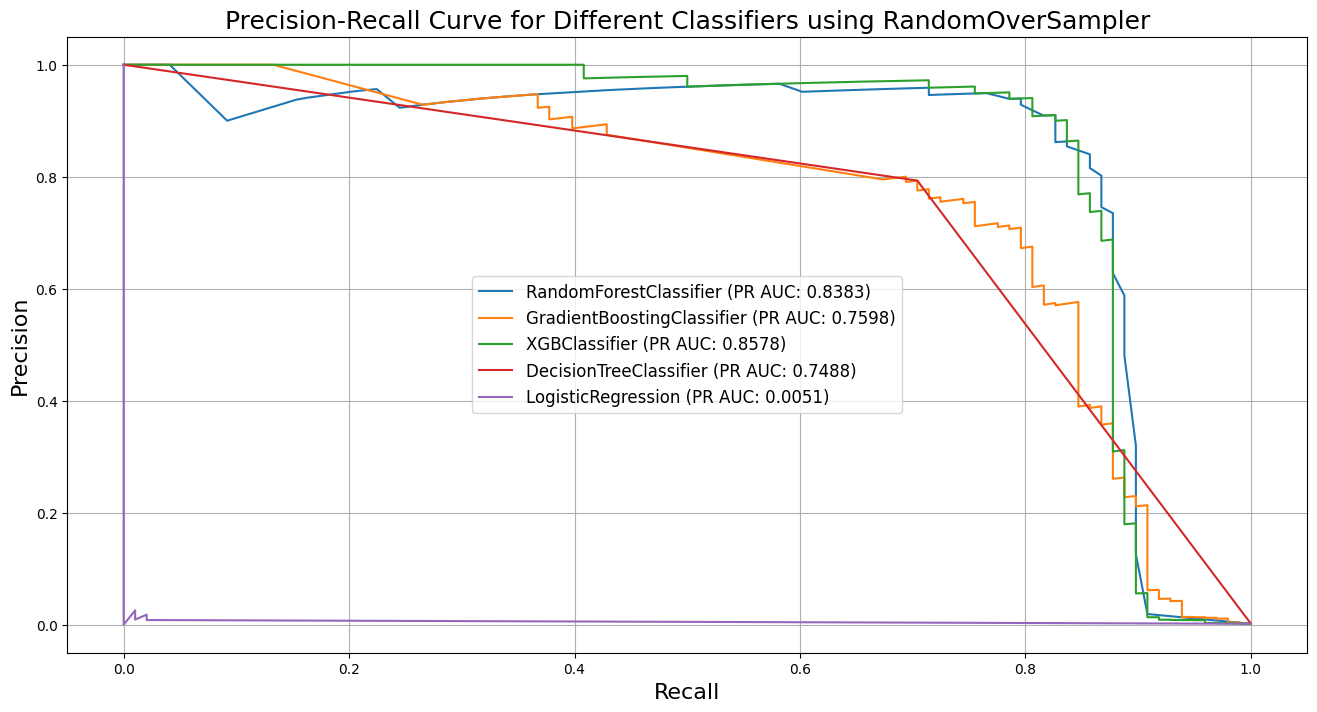

Training RandomForestClassifier with ADASYN
Training GradientBoostingClassifier with ADASYN
Training XGBClassifier with ADASYN
Training DecisionTreeClassifier with ADASYN
Training LogisticRegression with ADASYN


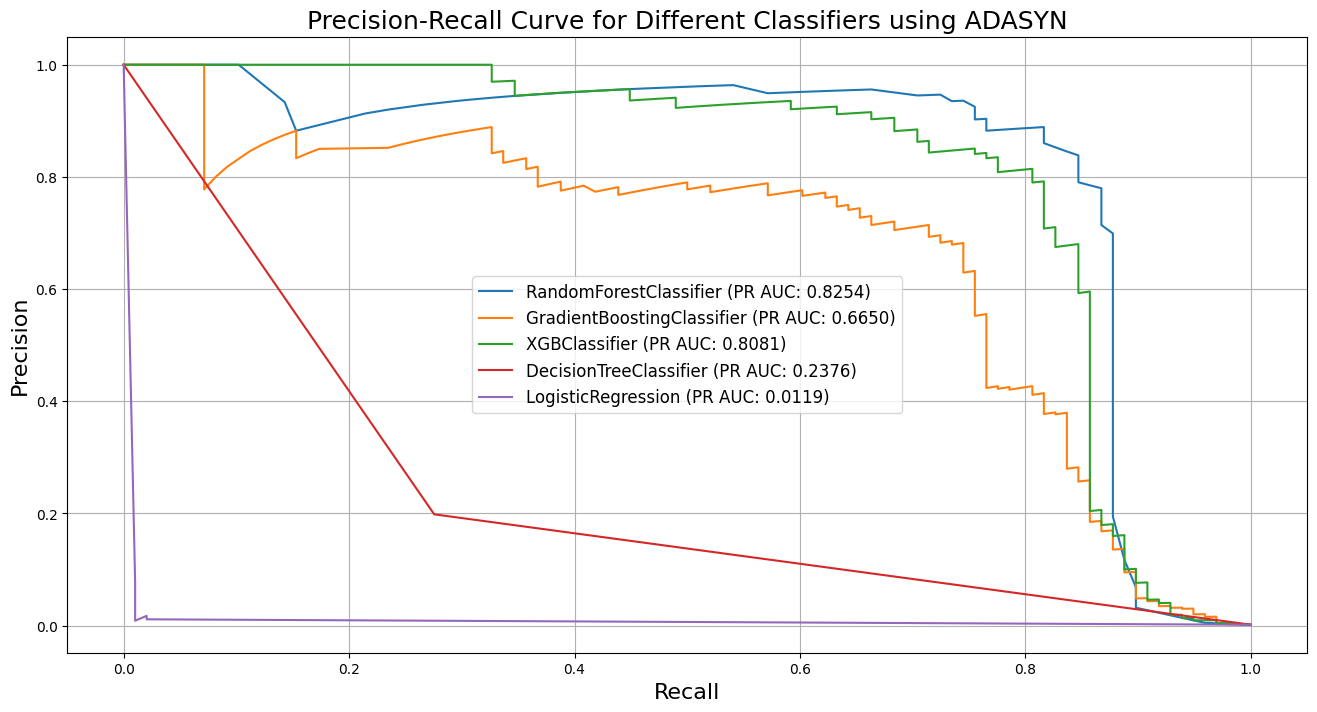

Training RandomForestClassifier with BorderlineSMOTE
Training GradientBoostingClassifier with BorderlineSMOTE
Training XGBClassifier with BorderlineSMOTE
Training DecisionTreeClassifier with BorderlineSMOTE
Training LogisticRegression with BorderlineSMOTE


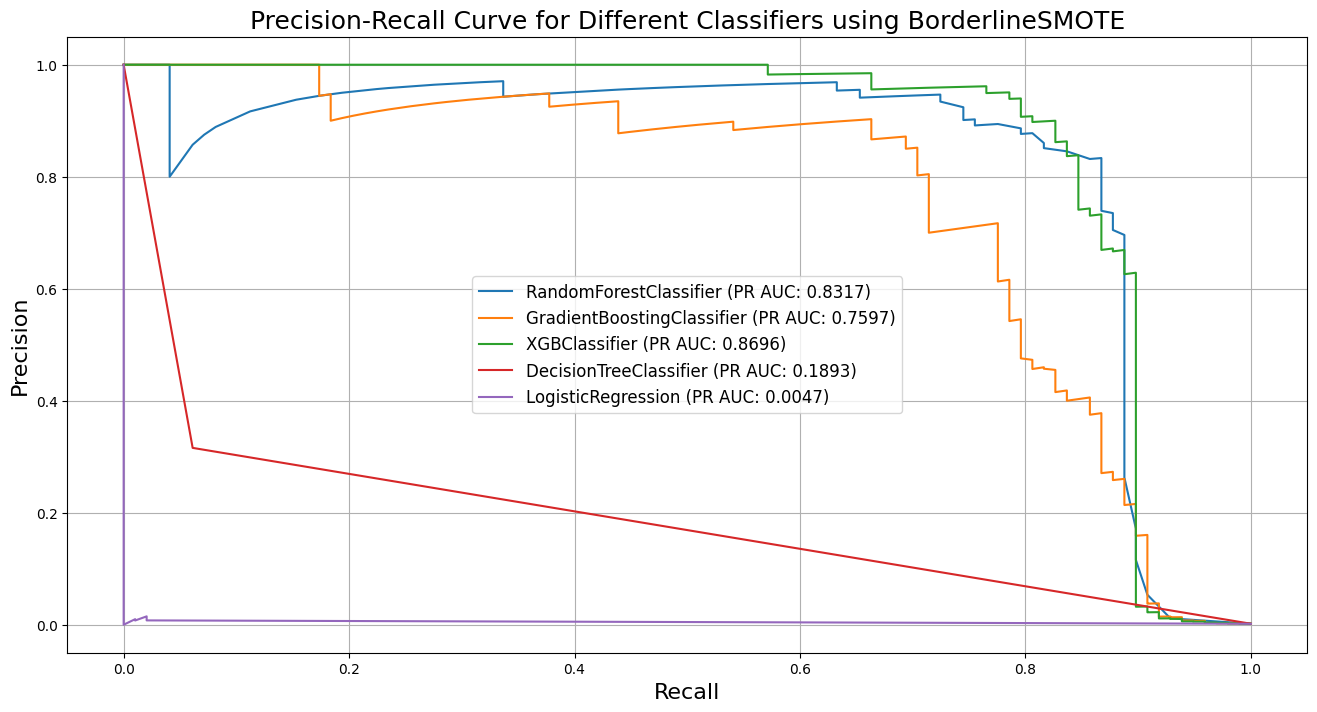

Training RandomForestClassifier with SMOTETomek
Training GradientBoostingClassifier with SMOTETomek
Training XGBClassifier with SMOTETomek
Training DecisionTreeClassifier with SMOTETomek
Training LogisticRegression with SMOTETomek


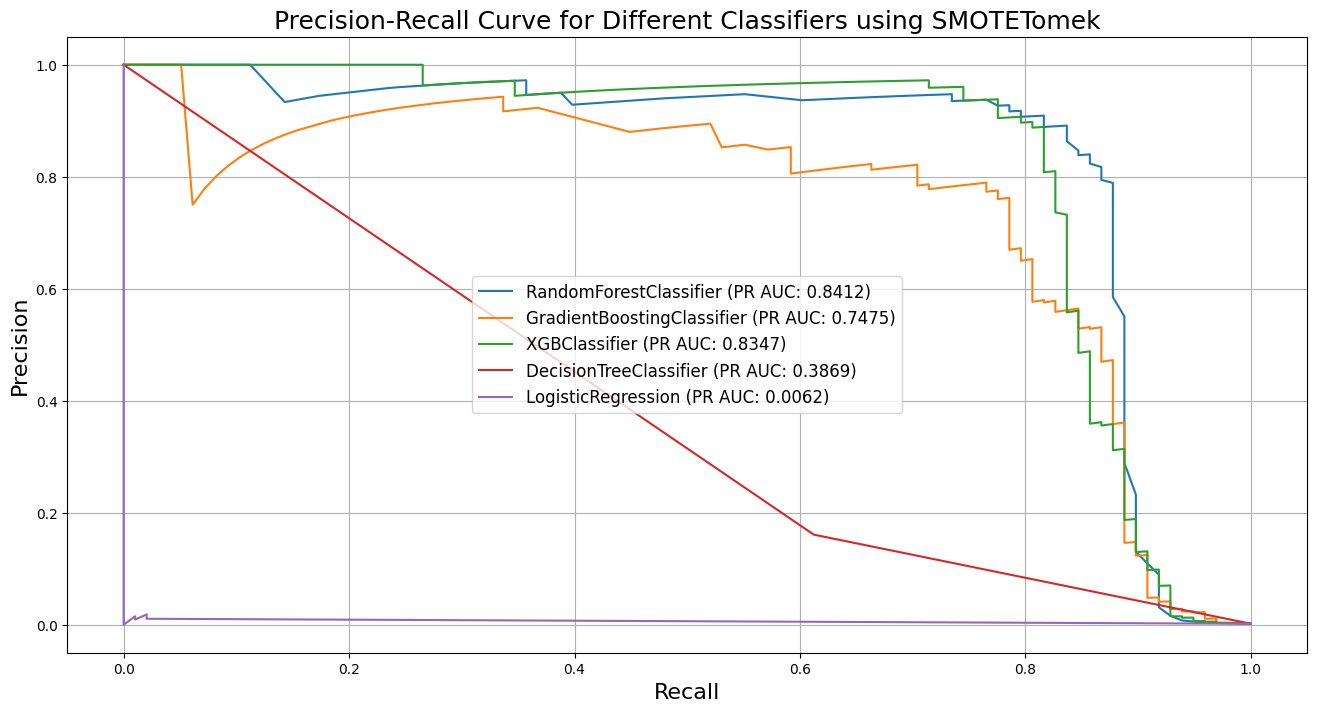


Results for SMOTE:
  RandomForestClassifier:
    PR AUC: 0.841
  GradientBoostingClassifier:
    PR AUC: 0.747
  XGBClassifier:
    PR AUC: 0.835
  DecisionTreeClassifier:
    PR AUC: 0.387
  LogisticRegression:
    PR AUC: 0.006

Results for RandomOverSampler:
  RandomForestClassifier:
    PR AUC: 0.838
  GradientBoostingClassifier:
    PR AUC: 0.760
  XGBClassifier:
    PR AUC: 0.858
  DecisionTreeClassifier:
    PR AUC: 0.749
  LogisticRegression:
    PR AUC: 0.005

Results for ADASYN:
  RandomForestClassifier:
    PR AUC: 0.825
  GradientBoostingClassifier:
    PR AUC: 0.665
  XGBClassifier:
    PR AUC: 0.808
  DecisionTreeClassifier:
    PR AUC: 0.238
  LogisticRegression:
    PR AUC: 0.012

Results for BorderlineSMOTE:
  RandomForestClassifier:
    PR AUC: 0.832
  GradientBoostingClassifier:
    PR AUC: 0.760
  XGBClassifier:
    PR AUC: 0.870
  DecisionTreeClassifier:
    PR AUC: 0.189
  LogisticRegression:
    PR AUC: 0.005

Results for SMOTETomek:
  RandomForestClassifier:
  

In [24]:
# Importing necessary libraries for the models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier 
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc

# Create arrays of resampled data and corresponding labels
X_train_resampled = [X_train_resampled_smote, X_train_resampled_ros, X_train_resampled_adasyn,
                     X_train_resampled_bsmote, X_train_resampled_smotetomek]
y_train_resampled = [y_train_resampled_smote, y_train_resampled_ros, y_train_resampled_adasyn,
                     y_train_resampled_bsmote, y_train_resampled_smotetomek]
resampling_methods = ['SMOTE', 'RandomOverSampler', 'ADASYN', 'BorderlineSMOTE', 'SMOTETomek']

# Define classifiers
classifiers = [
    RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=1),
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    LogisticRegression(class_weight='balanced', random_state=42)
]

# Function to evaluate model using PR AUC
def evaluate_model_pr_auc(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    cm = confusion_matrix(y_test, y_pred)

    # Calculate precision and recall for PR curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

    # Calculate PR AUC
    pr_auc = auc(recall, precision)

    return cm, pr_auc, precision, recall

# Function to plot Precision-Recall curves
def plot_pr_curves(pr_data, method):
    plt.figure(figsize=(16, 8))
    plt.title(f'Precision-Recall Curve for Different Classifiers using {method}', fontsize=18)

    for clf_name, (precision, recall, pr_auc) in pr_data.items():
        plt.plot(recall, precision, label=f'{clf_name} (PR AUC: {pr_auc:.4f})')

    plt.xlabel('Recall', fontsize=16)
    plt.ylabel('Precision', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# Loop through resampling methods and classifiers
results = {}
for i, (X_train, y_train) in enumerate(zip(X_train_resampled, y_train_resampled)):
    method = resampling_methods[i]
    results[method] = {}
    pr_data = {}

    for clf in classifiers:
        clf_name = clf.__class__.__name__
        print(f"Training {clf_name} with {method}")

        # Train the model
        clf.fit(X_train, y_train)

        # Evaluate the model using PR AUC
        cm, pr_auc, precision, recall = evaluate_model_pr_auc(clf, X_test, y_test)

        # Store results
        results[method][clf_name] = {
            'confusion_matrix': cm,
            'pr_auc': pr_auc
        }
        pr_data[clf_name] = (precision, recall, pr_auc)

    # Plot Precision-Recall curves for this resampling method
    plot_pr_curves(pr_data, method)

# Print results
for method, clf_results in results.items():
    print(f"\nResults for {method}:")
    for clf_name, metrics in clf_results.items():
        print(f"  {clf_name}:")
        print(f"    PR AUC: {metrics['pr_auc']:.3f}")


# Inference

Based on the results provided, it appears that the XGBClassifier combined with BorderlineSMOTE oversampling technique yielded the highest performance, achieving a PR AUC score of 0.870. This combination outperformed all other algorithm and oversampling technique pairings. The RandomForestClassifier also demonstrated consistently strong performance across different oversampling methods, with PR AUC scores ranging from 0.823 to 0.840. In contrast, the LogisticRegression algorithm performed poorly across all oversampling techniques, with PR AUC scores consistently below 0.012.

Among the oversampling techniques, RandomOverSampler and BorderlineSMOTE seemed to be the most effective overall, producing high PR AUC scores when paired with the top-performing algorithms. SMOTE and SMOTETomek showed similar performance patterns, while ADASYN appeared to be less effective in improving the PR AUC scores for most algorithms. It's worth noting that the DecisionTreeClassifier showed high variability in performance across different oversampling techniques, ranging from a PR AUC of 0.189 with BorderlineSMOTE to 0.749 with RandomOverSampler.